In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()
rng=np.random.RandomState(42)
noise=rng.normal(size=(len(cancer.data),50))

X_w_noise=np.hstack([cancer.data,noise])

X_train,X_test,y_train,y_test=train_test_split(X_w_noise,cancer.target,
                                              random_state=0,test_size=.5)
select=SelectPercentile(percentile=50)
select.fit(X_train,y_train)

X_train_selected=select.transform(X_train)

print('X_train.shape: {}'.format(X_train.shape))
print('X_train_selected.shape: {}'.format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)
X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


In [15]:
np.random.RandomState(1).normal(size=(10,10))

array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
        -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038],
       [ 1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
        -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521],
       [-1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
        -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547],
       [-0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
        -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416],
       [-0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
        -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311],
       [ 0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
         0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116],
       [-0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
        -0.07557171,  1.13162939,  1.51981682

array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
        -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038],
       [ 1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
        -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521],
       [-1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
        -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547],
       [-0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
        -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416],
       [-0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
        -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311],
       [ 0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
         0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116],
       [-0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
        -0.07557171,  1.13162939,  1.51981682

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]
[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

Text(0.5, 0, 'Sample index')

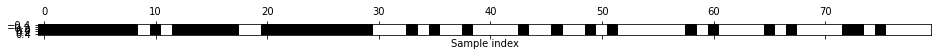

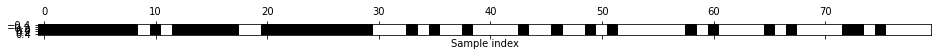

In [16]:
mask=select.get_support()
print(mask)

plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('Sample index')

In [17]:
from sklearn.linear_model import LogisticRegression

X_test_selected=select.transform(X_test)

lr=LogisticRegression()
lr.fit(X_train,y_train)
print('Score with all features: {:.3f}'.format(lr.score(X_test,y_test)))
lr.fit(X_train_selected,y_train)
print('Score with only selected features: {:.3f}'.format(lr.score(X_test_selected,
                                                                 y_test)))

Score with all features: 0.916
Score with only selected features: 0.916
Score with all features: 0.916
Score with only selected features: 0.916


In [18]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select=SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),
                      threshold='median')

In [19]:
select.fit(X_train,y_train)
X_train_l1=select.transform(X_train)
print('X_train.shape: {}'.format(X_train.shape))
print('X_train_l1.shape: {}'.format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)
X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'Sample index')

Text(0.5, 0, 'Sample index')

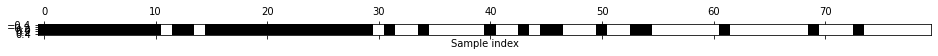

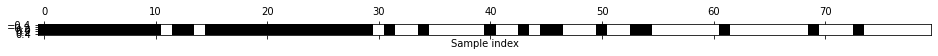

In [20]:
mask=select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('Sample index')

In [21]:
X_test_l1=select.transform(X_test)
score=LogisticRegression().fit(X_train_l1,y_train).score(X_test_l1,y_test)
print('Test score: {:.3f}'.format(score))


Test score: 0.930
Test score: 0.930


Text(0.5, 0, 'Sample index')

Text(0.5, 0, 'Sample index')

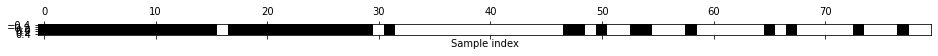

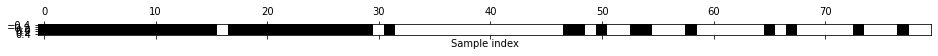

In [22]:
from sklearn.feature_selection import RFE
select=RFE(RandomForestClassifier(n_estimators=100,random_state=42),
           n_features_to_select=40)
select.fit(X_train,y_train)
mask=select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('Sample index')


In [23]:
X_train_rfe=select.transform(X_train)
X_test_rfe=select.transform(X_test)
score=LogisticRegression().fit(X_train_rfe,y_train).score(X_train_rfe,y_train)
print('Test score: {:.3f}'.format(score))

Test score: 0.961
Test score: 0.961


In [24]:
print('Test score: {:.3f}'.format(select.score(X_test,y_test)))

Test score: 0.951
Test score: 0.951


In [26]:
import mglearn
citibike=mglearn.datasets.load_citibike()

In [27]:
print('Citi Bike data:\n{}'.format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64
Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

Text(0, 0.5, 'Rentals')

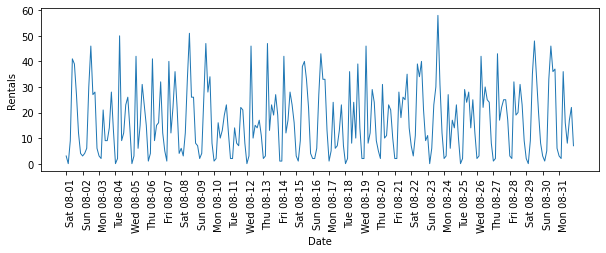

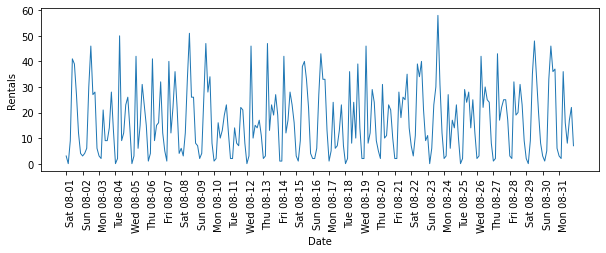

In [29]:
import pandas as pd
plt.figure(figsize=(10,3))
xticks=pd.date_range(start=citibike.index.min(),end=citibike.index.max(),freq='D')
plt.xticks(xticks,xticks.strftime('%a %m-%d'),rotation=90,ha='left')
plt.plot(citibike,linewidth=1)
plt.xlabel('Date')
plt.ylabel('Rentals')

In [45]:
y=citibike.values
X=citibike.index.strftime("%s")


In [49]:
citibike

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
                       ..
2015-08-31 09:00:00    16
2015-08-31 12:00:00     8
2015-08-31 15:00:00    17
2015-08-31 18:00:00    22
2015-08-31 21:00:00     7
Freq: 3H, Name: one, Length: 248, dtype: int64

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
                       ..
2015-08-31 09:00:00    16
2015-08-31 12:00:00     8
2015-08-31 15:00:00    17
2015-08-31 18:00:00    22
2015-08-31 21:00:00     7
Freq: 3H, Name: one, Length: 248, dtype: int64

In [47]:
n_train=184

def eval_on_features(features,target,regressor):
    X_train,X_test=features[:n_train],features[n_train:]
    y_train,y_test=target[:n_train],target[n_train:]
    regressor.fit(X_train,y_train)
    print('Test-set R^2: {:.2f}'.format(regressor.score(X_test,y_test)))
    y_pred=regressor.predict(X_test)
    y_pred_train=regressor.predict(X_train)
    plt.figure(figsize=(10,3))
    
    plt.xticks(range(0,len(X),8),xticks.strftime('%a %m-%d'),rotation=90,
              ha='left')
    plt.plot(range(n_train),y_train,label='train')
    plt.plot(range(n_train,len(y_test)+n_train),y_test,'-',label='test')
    plt.plot(range(n_train),y_pred_train,'--',label='prediction train')
    plt.plot(range(n_train,len(y_test)+n_train),y_pred,'--',
             label='prediction test')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Rentals')

In [48]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
plt.figure()
eval_on_features(X,y,regressor)

ValueError: could not convert string to float: '2015-08-01 00:00:00'

<Figure size 432x288 with 0 Axes>

ValueError: could not convert string to float: '2015-08-01 00:00:00'

<Figure size 432x288 with 0 Axes>

In [50]:
X_hour=citibike.index.hour.reshape(-1,1)
eval_on_features(X_hour,y,regressor)

AttributeError: 'Int64Index' object has no attribute 'reshape'

AttributeError: 'Int64Index' object has no attribute 'reshape'